# IA notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Descenso del Gradiente en funciones 2D


---



<function matplotlib.pyplot.show>

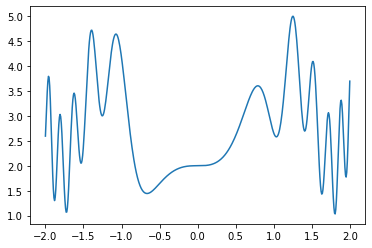

In [6]:
f = lambda x: (np.sin(4*x**3)-np.cos(2*x**2)+3)

X = np.linspace(-2,2,500)
Y = []
for x in X:
  Y.append(f(x))
plt.plot(X,Y)
plt.show

In [7]:
"""
  funcion para calcular la pendiente de la tangente de f en un punto
"""

def pendiente(f,x):
  h = 0.01
  return (f(x+h)-f(x))/h

# print(pendiente(0))
tangente = lambda f,x,i: f(i)+pendiente(f,i)*x-1

# X2 = []
# for i in range(1000):
#   X2.append(tangente(Y[i],90))


punto de partida:  -0.12367992452324383 1.992900424698989
minimo local:  -0.6692621843634252 1.4434180712684093


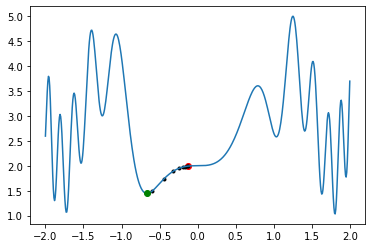

In [8]:
xrand = np.random.rand()*4 - 2
yrand = f(xrand)

plt.plot(xrand,yrand,'o',c='red')

lr = 0.001 # learnig rate

def gradientDescent(ntest,xinit,lr):
  for i in range(ntest):
    xinit = xinit - ( pendiente(f,xinit) * lr)
    yrand = f(xinit)
    if i%100 == 0:
      plt.plot(xinit,yrand,'.',c='black')
  return xinit,yrand 
print("punto de partida: ",xrand, yrand)
xrand,yrand = gradientDescent(1000,xrand,lr)
# plt.plot(Y,X2)

plt.plot(X,Y)
plt.plot(xrand,yrand,'o',c='green')
plt.showDescenso
print("minimo local: ",xrand,yrand)

## Descenso del Grandiente en funciones 3D

---



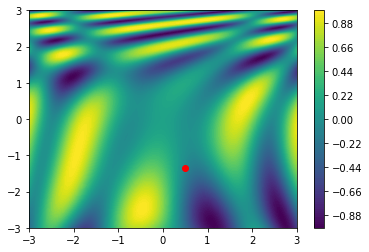

In [10]:
f2 = lambda th: np.sin(((1/2)*th[0]**2)-((1/4)*th[1]**2)+3)*np.cos(2*th[0]+1-np.e**th[1])
#f2 = lambda th: np.sin(th[0])+np.sin(th[1])*np.cos(th[1])+np.cos(th[0])
#f2 = lambda th: np.sin(th[0])+np.sin(th[0]**2)/2 + np.sin(th[1])+ np.sin(th[1]**2)/2 +np.cos(th[0])+np.cos(th[0]**2)+np.cos(th[1])+np.cos(th[1]**2)
#f2 = lambda th: (np.sin(4*th[0]**3)-np.cos(2*th[0]**2)+3) + (np.sin(4*th[1]**3)-np.cos(2*th[1]**2)+3)


rad = 3
num = 500
Y = np.linspace(-rad,rad,num)
X = np.linspace(-rad,rad,num)
Z = np.zeros((num,num))
for ix,x in enumerate(X):
  for iy, y in enumerate(Y):
    Z[iy,ix] = f2([x,y])

theta = np.random.rand(2) * 2*rad - rad

plt.plot(theta[0],theta[1],'o',c='red')
plt.contourf(X,Y,Z,100)
plt.colorbar()
plt.show()

theta inicial:  [ 1.34636905 -0.11137872] f(theta) =  0.6498190292187749
theta minimo:  [2.19869766 1.68525161] f(theta) =  -0.9999796707836369


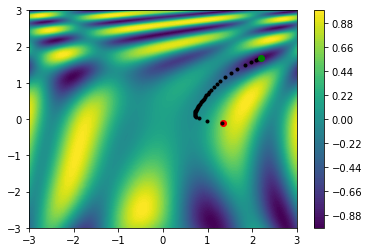

In [11]:
def gradientDescent(ntest,thetaInit,lr,f):
  h = 0.001
  # Vector gradiente donde se guarda la pendiente
  grad = np.zeros(2)
  for _ in range(ntest):
    for it,th in enumerate(thetaInit):
      _T = np.copy(thetaInit)
      _T[it] = _T[it] + h
      deriv = (f(_T)-f(thetaInit)) / h
      grad[it] = deriv
    # Equacion de Gradiente
    thetaInit = thetaInit - (grad * lr)
    if _ % 25 == 0:
      plt.plot(thetaInit[0],thetaInit[1],'.',c='black')
  return thetaInit


# Escoger el punto inicial aleatorio
theta = np.random.rand(2) * 2*1.5 - 1.5

# plot del escenario
plt.plot(theta[0],theta[1],'o',c='red')
plt.contourf(X,Y,Z,100)
plt.colorbar()

# descenso del gradiente
print("theta inicial: ",theta,"f(theta) = ",f2(theta))
theta = gradientDescent(10000,theta,0.01,f2)
plt.plot(theta[0],theta[1],'o',c='green')
plt.show
print("theta minimo: ",theta,"f(theta) = ",f2(theta))

## Descenso del gradiente en funciones nD

---


In [48]:
def gradientDescent(ntest, thetaInit, lr, f):
  h = 0.001
  grad = np.zeros(len(thetaInit))
  for _ in range(ntest):
    for i in range(len(thetaInit)):
      _T = np.copy(thetaInit)
      _T[i] = _T[i] + h
      deriv = (f(_T)-f(thetaInit)) / h
      grad[i] = deriv
    thetaInit = thetaInit - (grad * lr)
    if _ % 100 == 0:
      print("f(th) = ",f(thetaInit))
  return thetaInit


In [50]:
f3 = lambda th: np.sin(th[0])+np.sin(th[1])+np.sin(th[2])+np.sin(th[3])

theta = np.random.rand(4) * 10 - 5

print("theta inicial : ",theta," f(theta) = ",f3(theta))
theta = gradientDescent(1000,theta,0.001,f3)
print("theta minimo : ",theta," f(theta) = ",f3(theta))


theta inicial :  [-4.47391869 -2.8893833   1.21249502  3.08005434]  f(theta) =  1.7201497824444887
f(th) =  1.718037201330739
f(th) =  1.507294850342957
f(th) =  1.2992843534321241
f(th) =  1.0961123311366159
f(th) =  0.8991742076234495
f(th) =  0.7090742071289269
f(th) =  0.5256272177343464
f(th) =  0.34793457361733293
f(th) =  0.17451844210828826
f(th) =  0.0034968298104263162
theta minimo :  [-4.08225532 -2.12632118  0.65687702  3.96648834]  f(theta) =  -0.165505259941661
